# Examen des prédictions du modèle original sur les séquences de test

In [1]:
import json
import numpy as np
import pandas as pd
import sklearn

In [2]:
import h5py
import cooler

In [3]:
import matplotlib.pyplot as plt

In [4]:
predpath = "/home/bureau/projects/def-bureau/bureau/ran-donnees/PredictNeuronHi-C/akita_pred_test/"
predfile = predpath + "preds.h5"

In [5]:
pred = h5py.File(predfile, 'r')
pred

<HDF5 file "preds.h5" (mode r)>

In [6]:
pred.keys()

<KeysViewHDF5 ['preds']>

In [7]:
pred['preds'].shape

(6668, 99681, 5)

In [8]:
targetfile = "/home/bureau/projects/def-bureau/bureau/distiller/iPSC/data/1s/seqs_cov/0.h5"

In [9]:
targets = h5py.File(targetfile, 'r')
targets

<HDF5 file "0.h5" (mode r)>

In [10]:
# Les données de tests sont les 6668 (pred['preds'].shape[0]) dernières
test_targets = targets['targets'][targets['targets'].shape[0]-pred['preds'].shape[0]:,]

In [11]:
test_targets.shape

(6668, 99681)

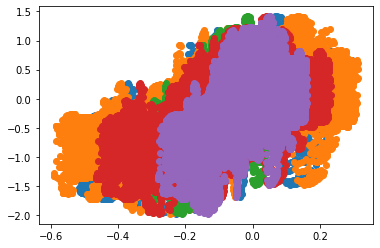

In [12]:
for i in range(5):
    plt.scatter(pred['preds'][0,:,i], test_targets[0,:])
plt.show()

## Calcul de l'erreur quadratique moyenne par lignée cellulaire utilisée pour la prédiction

In [13]:
from sklearn.metrics import mean_squared_error
mse_orig = []
for i in range(pred['preds'].shape[2]):
    mse_orig.append(mean_squared_error(test_targets,pred['preds'][:,:,i]))

In [14]:
display(mse_orig)

[0.4717, 0.4224, 0.3792, 0.455, 0.3687]

## Calcul de l'erreur quadratique moyenne par lignée cellulaire pour chaque séquence de 1Mb

In [21]:
mse_orig_seq = np.zeros((pred['preds'].shape[0],pred['preds'].shape[2]))
for i in range(pred['preds'].shape[2]):
    for j in range(pred['preds'].shape[0]):
        mse_orig_seq[j,i] = mean_squared_error(test_targets[j,],pred['preds'][j,:,i])

In [22]:
hic_targets = pd.read_csv('/home/bureau/projects/def-bureau/basenji/manuscripts/akita/data/targets.txt',sep='\t')
hic_targets

,index,identifier,file,clip,description
0,0,HFF,../../data/coolers/Krietenstein2019/HFF_hg38_4...,2,HFF
1,1,H1hESC,../../data/coolers/Krietenstein2019/H1hESC_hg3...,2,H1hESC
2,2,GM12878,../../data/coolers/Rao2014/GM12878_inSitu_MboI...,2,GM12878
3,3,IMR90,../../data/coolers/Rao2014/IMR90_inSitu_MboI_a...,2,IMR90
4,4,HCT116,../../data/coolers/Rao2017/Unsynchronized_all....,2,HCT116


In [23]:
mse_orig_dat = pd.DataFrame(mse_orig_seq,columns=hic_targets['identifier'])
mse_orig_dat

identifier,HFF,H1hESC,GM12878,IMR90,HCT116
0,0.160034,0.152710,0.182983,0.167480,0.192261
1,0.127441,0.130371,0.127075,0.126343,0.127319
2,0.530762,0.413330,0.311768,0.530762,0.309326
3,0.270264,0.201782,0.179688,0.261963,0.168701
4,0.213379,0.182251,0.169922,0.194824,0.169067
...,...,...,...,...,...
6663,0.684082,0.553711,0.448730,0.670410,0.404297
6664,0.362061,0.340332,0.306396,0.350342,0.297852
6665,0.456543,0.346924,0.295898,0.415283,0.268555
6666,0.555176,0.467773,0.390625,0.510254,0.370605


In [24]:
#mse_var = map(lambda x : x.var(), list(mse_orig_dat.columns))
mse_orig_dat.mean()

identifier
HFF        0.471636
H1hESC     0.422451
GM12878    0.379225
IMR90      0.455006
HCT116     0.368609
dtype: float64

In [19]:
mse_orig_dat.to_csv("mse_orig_dat.csv")

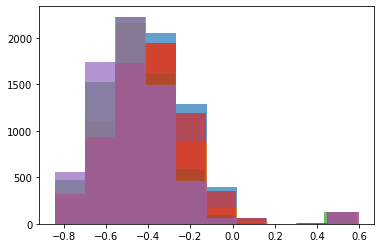

In [31]:
mse_orig_tr = mse_orig_seq.transpose()
for i in range(len(mse_orig_tr)) :
    plt.hist(np.log10(mse_orig_tr[i]),alpha=0.7)
plt.show()

In [15]:
from sklearn.metrics import explained_variance_score
r2_orig = []
for i in range(pred['preds'].shape[2]):
    r2_orig.append(explained_variance_score(test_targets,pred['preds'][:,:,i]))

In [16]:
display(r2_orig)

[-0.43657014900971597,
 -0.2945240826047592,
 -0.16677623493945687,
 -0.38689801325603673,
 -0.12814269120055477]

In [25]:
r2_orig_seq = np.zeros((pred['preds'].shape[0],pred['preds'].shape[2]))
for i in range(pred['preds'].shape[2]):
    for j in range(pred['preds'].shape[0]):
        r2_orig_seq[j,i] = explained_variance_score(test_targets[j,],pred['preds'][j,:,i])

In [26]:
r2_orig_dat = pd.DataFrame(r2_orig_seq,columns=hic_targets['identifier'])
r2_orig_dat

identifier,HFF,H1hESC,GM12878,IMR90,HCT116
0,0.308105,0.335449,0.202637,0.273438,0.182129
1,0.090332,0.069336,0.095215,0.098145,0.088379
2,-0.036133,0.060547,0.101074,-0.042969,0.125977
3,-0.214844,0.074707,0.128906,-0.160156,0.175781
4,0.063965,0.194336,0.225098,0.134277,0.229004
...,...,...,...,...,...
6663,-1.710938,-1.265625,-0.865234,-1.671875,-0.701172
6664,-0.348633,-0.262695,-0.136719,-0.303711,-0.099609
6665,-1.396484,-0.891602,-0.619141,-1.175781,-0.484375
6666,-0.963867,-0.655273,-0.375977,-0.804688,-0.291992


In [33]:
r2_orig_dat.describe()

identifier,HFF,H1hESC,GM12878,IMR90,HCT116
count,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000
mean,-1.600342,-1.112020,-0.628632,-1.401528,-0.456898
std,8.485899,5.632772,3.420281,7.561402,2.476228
min,-155.500000,-89.125000,-69.187500,-150.125000,-48.687500
25%,-1.042969,-0.740234,-0.457275,-0.942383,-0.351807
50%,-0.473633,-0.358398,-0.175781,-0.394531,-0.127930
75%,-0.110352,-0.088623,-0.013672,-0.079102,-0.003906
max,0.632812,0.625488,0.619141,0.643555,0.579102


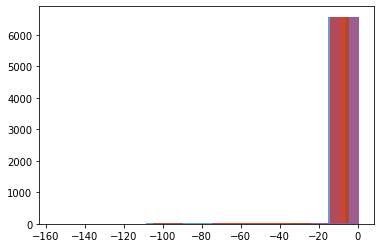

In [31]:
r2_orig_tr = r2_orig_seq.transpose()
for i in range(len(r2_orig_tr)) :
    plt.hist(r2_orig_tr[i],alpha=0.7)
plt.show()